<a href="https://colab.research.google.com/github/kodandachalla/Mathematics-and-Statistics-for-Data-Science/blob/main/Log_Normal_vs_Weibull_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1700493893.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, label=f'Var ($\sigma^2$) = {var}', color=color, lw=2)


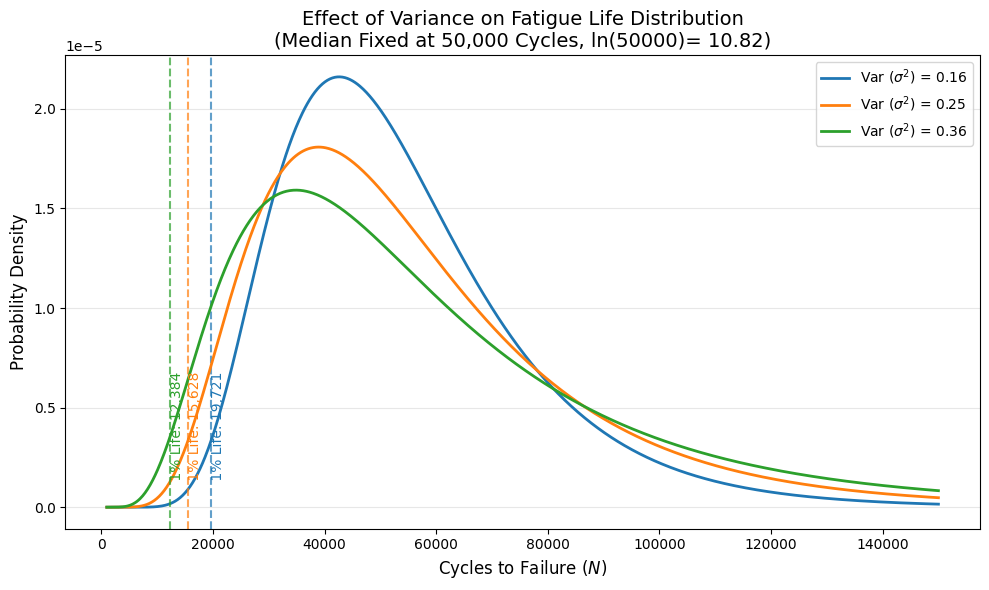

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

def plot_fatigue_sensitivity(mu_log, variances, prob_target=0.01):
    plt.figure(figsize=(10, 6))

    # Generate a range of cycles for the x-axis
    # We look from 1,000 to 150,000 cycles to see the distribution
    x = np.linspace(1000, 150000, 1000)

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    for var, color in zip(variances, colors):
        sigma = np.sqrt(var)

        # Log-normal PDF in scipy: s=sigma, scale=exp(mu)
        pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu_log))

        # Calculate B1 life (1% failure threshold)
        z_score = norm.ppf(prob_target)
        b1_life = np.exp(mu_log + z_score * sigma)

        # Plot the distribution
        plt.plot(x, pdf, label=f'Var ($\sigma^2$) = {var}', color=color, lw=2)

        # Add a vertical dashed line for the 1% threshold
        plt.axvline(b1_life, color=color, linestyle='--', alpha=0.7)
        plt.text(b1_life, plt.ylim()[1]*0.05, f' 1% Life: {int(b1_life):,}',
                 color=color, rotation=90, verticalalignment='bottom')

    plt.title(f'Effect of Variance on Fatigue Life Distribution\n(Median Fixed at 50,000 Cycles, ln(50000)= 10.82)', fontsize=14)
    plt.xlabel('Cycles to Failure ($N$)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Parameters
mu_val = 10.82  # Log-mean corresponding to 50k median
vars_to_test = [0.16, 0.25, 0.36]

plot_fatigue_sensitivity(mu_val, vars_to_test)

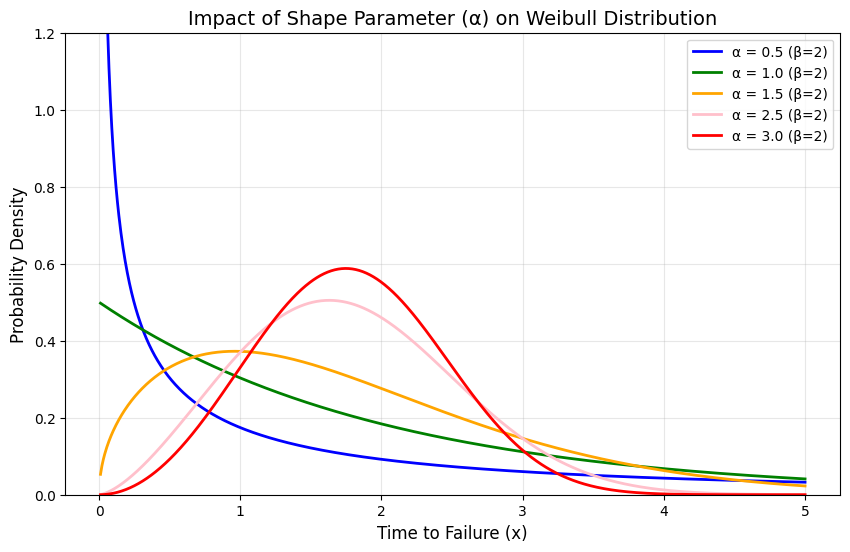

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

def plot_weibull_alpha_comparison():
    # Define range for the x-axis (e.g., time or strength)
    x = np.linspace(0.01, 5, 1000)

    # Keep beta (scale parameter) constant
    beta = 2

    # Define different alpha (shape) values to compare
    # alpha < 1: Decreasing failure rate
    # alpha = 1: Constant failure rate (Exponential)
    # alpha > 1: Increasing failure rate (Wear-out)
    alphas = [0.5, 1.0, 1.5, 2.5, 3.0]
    colors = ['blue', 'green', 'orange', 'pink','red']

    plt.figure(figsize=(10, 6))

    for a, color in zip(alphas, colors):
        # In scipy.stats, 'c' is the shape parameter alpha
        # 'scale' is the scale parameter beta
        pdf = weibull_min.pdf(x, c=a, scale=beta)
        plt.plot(x, pdf, label=f'α = {a} (β={beta})', color=color, lw=2)

    plt.title('Impact of Shape Parameter (α) on Weibull Distribution', fontsize=14)
    plt.xlabel('Time to Failure (x)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.ylim(0, 1.2)
    plt.show()

if __name__ == "__main__":
    plot_weibull_alpha_comparison()

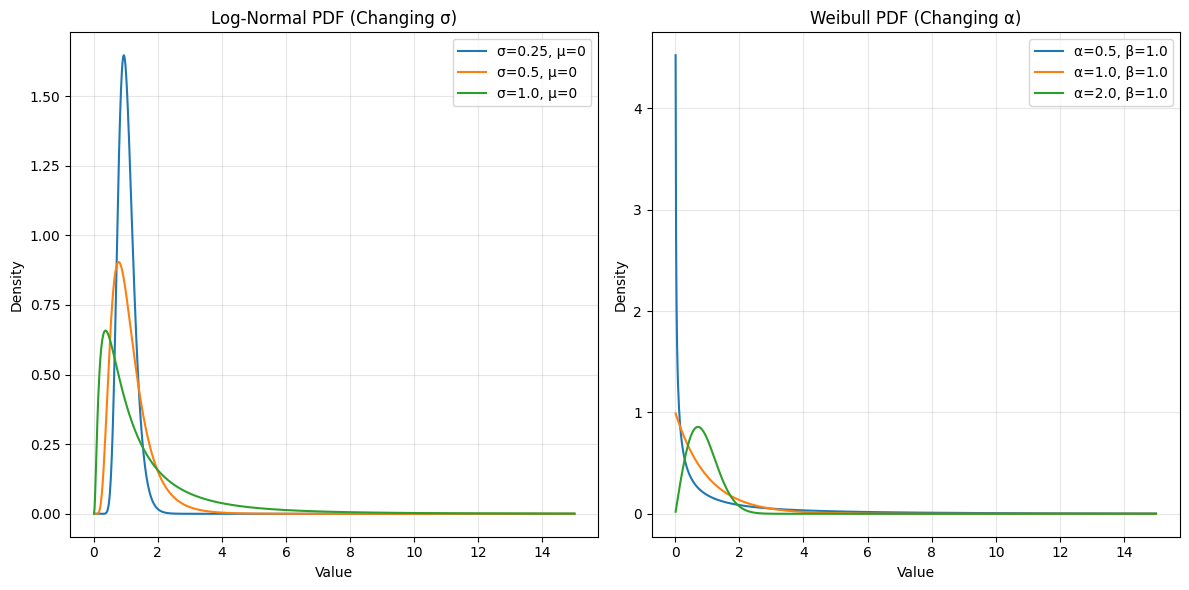

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, weibull_min

# Set up the range for the x-axis (e.g., time to failure)
x = np.linspace(0.01, 15, 1000)

def plot_distributions():
    plt.figure(figsize=(12, 6))

    # --- Log-Normal Variations ---
    # Parameters: s (sigma), scale (exp(mu))
    # mu is set to 0 for simplicity, so scale = exp(0) = 1
    plt.subplot(1, 2, 1)
    sigmas = [0.25, 0.5, 1.0]
    for s in sigmas:
        plt.plot(x, lognorm.pdf(x, s, scale=1), label=f'σ={s}, μ=0')
    plt.title('Log-Normal PDF (Changing σ)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(alpha=0.3)

    # --- Weibull Variations ---
    # Parameters: c (shape parameter alpha), scale (beta)
    plt.subplot(1, 2, 2)
    alphas = [0.5, 1.0, 2.0] # <1: decreasing, 1: constant, >1: increasing hazard
    beta = 1.0
    for a in alphas:
        plt.plot(x, weibull_min.pdf(x, a, scale=beta), label=f'α={a}, β={beta}')
    plt.title('Weibull PDF (Changing α)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_distributions()